In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tnrange, tqdm_notebook
import gc

In [2]:
sns.set_context('talk')

In [12]:
import warnings
warnings.filterwarnings('ignore', message='Changing the shape of non-C contiguous array')

# Read the data

In [3]:
dfXtrain = pd.read_csv('preprocessed_csv/train_more.csv', index_col='id')
dfXtest = pd.read_csv('preprocessed_csv/test_more.csv', index_col='id')
dfYtrain = pd.read_csv('preprocessed_csv/y_train_more.csv', header=None, names=['INDEX', 'P_TARGET_FLAG'])

In [4]:
x_train = np.array(dfXtrain)
x_test = np.array(dfXtest)

y_train = np.array(dfYtrain['P_TARGET_FLAG'])

# Save routines

In [5]:
dfYtest = pd.DataFrame({'INDEX': dfXtest.index, 'P_TARGET_FLAG': np.zeros(x_test.shape[0])})
dfYtest.head()

,INDEX,P_TARGET_FLAG
0,3,0.0
1,9,0.0
2,10,0.0
3,18,0.0
4,21,0.0


In [6]:
def save_to_file(y, file_name):
    dfYtest['P_TARGET_FLAG'] = y
    dfYtest.to_csv('results/{}'.format(file_name), index=False)

# Train XGB

In [7]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
XGBC = xgb.XGBClassifier

In [15]:
def plot_quality(grid_searcher, param_name):
    means = []
    stds = []
    for elem in grid_searcher.grid_scores_:
        means.append(np.mean(elem.cv_validation_scores))
        stds.append(np.sqrt(np.var(elem.cv_validation_scores)))
    means = np.array(means)
    stds = np.array(stds)
    
    params = grid_searcher.param_grid
    
    plt.figure(figsize=(8, 6))
    plt.plot(params[param_name], means)
    plt.fill_between(params[param_name], \
                 means + stds, means - stds, alpha = 0.3, facecolor='blue')
    plt.xlabel(param_name)
    plt.ylabel('AUC')

In [17]:
kwargs = {'objective':'binary:logistic', 'missing': -1, 'seed': 56,
          'reg_alpha': 0.1}

params = {'n_estimators': [10, 50, 100, 200, 300, 400]}


grid_searcher = GridSearchCV(XGBC(**kwargs), params, fit_params={'eval_metric': 'auc'}, 
                             cv=5, scoring='roc_auc', n_jobs=-1)
grid_searcher.fit(x_train, y_train)

print(grid_searcher.best_score_)
print(grid_searcher.best_estimator_)

0.822126970565
XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=-1, n_estimators=200, nthread=-1,
       objective='binary:logistic', reg_alpha=0.1, reg_lambda=1,
       scale_pos_weight=1, seed=56, silent=True, subsample=1)


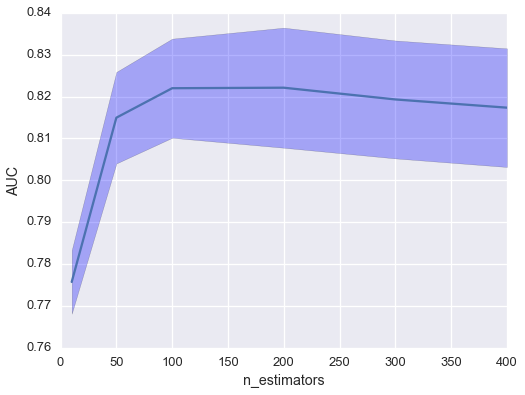

In [18]:
plot_quality(grid_searcher, 'n_estimators')

In [21]:
%%time

kwargs = {'objective':'binary:logistic', 'missing': -1, 'seed': 56,
          'reg_alpha': 0.1}

params = {'n_estimators': np.arange(100, 300, 20)}


grid_searcher = GridSearchCV(XGBC(**kwargs), params, fit_params={'eval_metric': 'auc'}, 
                             cv=5, scoring='roc_auc', n_jobs=-1)
grid_searcher.fit(x_train, y_train)

print(grid_searcher.best_score_)
print(grid_searcher.best_estimator_)

0.822914830673
XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=-1, n_estimators=160, nthread=-1,
       objective='binary:logistic', reg_alpha=0.1, reg_lambda=1,
       scale_pos_weight=1, seed=56, silent=True, subsample=1)
CPU times: user 5.04 s, sys: 122 ms, total: 5.16 s
Wall time: 1min 32s


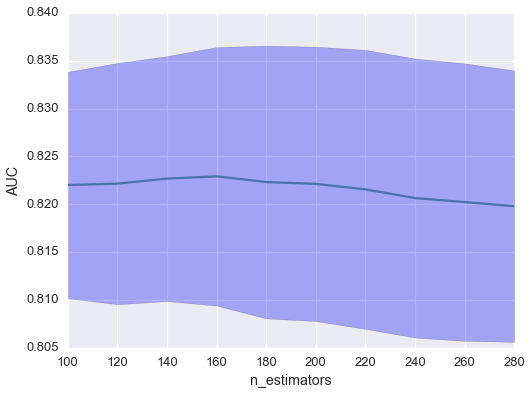

In [22]:
plot_quality(grid_searcher, 'n_estimators')

n_estimators = 160

In [23]:
%%time

kwargs = {'objective':'binary:logistic', 'missing': -1, 'seed': 56,
          'n_estimators': 160}

params = {'reg_alpha': [0, 0.1, 0.5, 1, 5]}


grid_searcher = GridSearchCV(XGBC(**kwargs), params, fit_params={'eval_metric': 'auc'}, 
                             cv=5, scoring='roc_auc', n_jobs=-1)
grid_searcher.fit(x_train, y_train)

print(grid_searcher.best_score_)
print(grid_searcher.best_estimator_)

0.823090381386
XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=-1, n_estimators=160, nthread=-1,
       objective='binary:logistic', reg_alpha=1, reg_lambda=1,
       scale_pos_weight=1, seed=56, silent=True, subsample=1)
CPU times: user 4.6 s, sys: 99.9 ms, total: 4.7 s
Wall time: 35.1 s


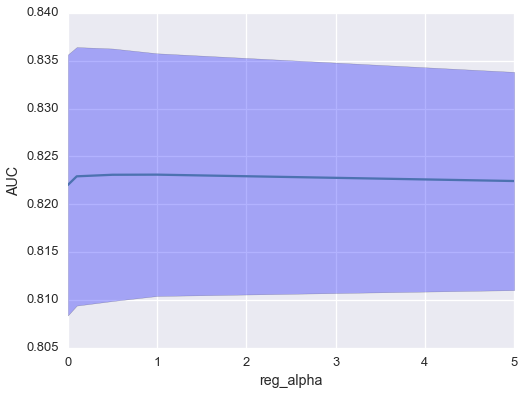

In [24]:
plot_quality(grid_searcher, 'reg_alpha')

In [29]:
%%time

kwargs = {'objective':'binary:logistic', 'missing': -1, 'seed': 56,
          'n_estimators': 160}

params = {'reg_alpha': np.arange(1, 10, 1)}


grid_searcher = GridSearchCV(XGBC(**kwargs), params, fit_params={'eval_metric': 'auc'}, 
                             cv=5, scoring='roc_auc', n_jobs=-1)
grid_searcher.fit(x_train, y_train)

print(grid_searcher.best_score_)
print(grid_searcher.best_estimator_)

0.82336935443
XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=-1, n_estimators=160, nthread=-1,
       objective='binary:logistic', reg_alpha=6, reg_lambda=1,
       scale_pos_weight=1, seed=56, silent=True, subsample=1)
CPU times: user 4.91 s, sys: 169 ms, total: 5.08 s
Wall time: 1min 5s


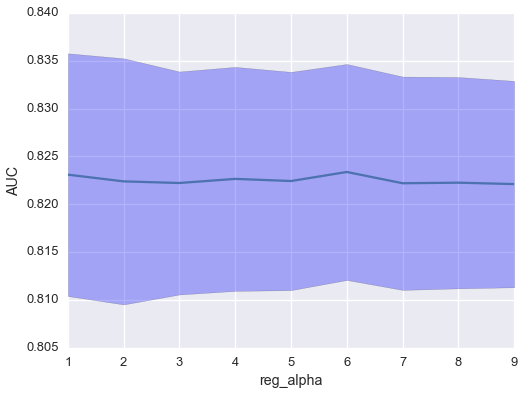

In [30]:
plot_quality(grid_searcher, 'reg_alpha')

reg_alpha = 6

In [33]:
%%time

kwargs = {'objective':'binary:logistic', 'missing': -1, 'seed': 56,
          'n_estimators': 160, 'reg_alpha': 6}

params = {'reg_lambda': [0.1, 0.5, 1, 5, 10, 50]}


grid_searcher = GridSearchCV(XGBC(**kwargs), params, fit_params={'eval_metric': 'auc'}, 
                             cv=5, scoring='roc_auc', n_jobs=-1)
grid_searcher.fit(x_train, y_train)

print(grid_searcher.best_score_)
print(grid_searcher.best_estimator_)

0.82336935443
XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=-1, n_estimators=160, nthread=-1,
       objective='binary:logistic', reg_alpha=6, reg_lambda=1,
       scale_pos_weight=1, seed=56, silent=True, subsample=1)
CPU times: user 5.3 s, sys: 128 ms, total: 5.43 s
Wall time: 52.9 s


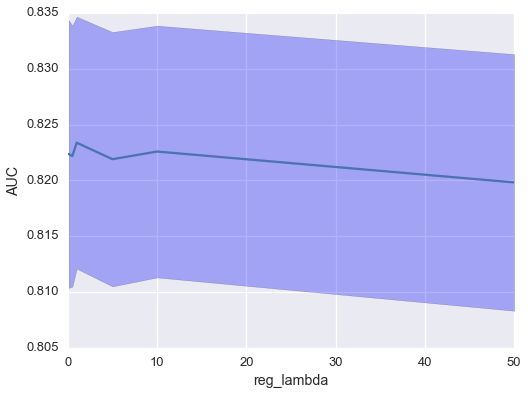

In [34]:
plot_quality(grid_searcher, 'reg_lambda')

reg_lambda = 1

In [35]:
%%time

kwargs = {'objective':'binary:logistic', 'missing': -1, 'seed': 56,
          'n_estimators': 160, 'reg_alpha': 6, 'reg_lambda': 1}

params = {'max_depth': [2, 3, 5, 9, 17]}


grid_searcher = GridSearchCV(XGBC(**kwargs), params, fit_params={'eval_metric': 'auc'}, 
                             cv=5, scoring='roc_auc', n_jobs=-1)
grid_searcher.fit(x_train, y_train)

print(grid_searcher.best_score_)
print(grid_searcher.best_estimator_)

0.82336935443
XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=-1, n_estimators=160, nthread=-1,
       objective='binary:logistic', reg_alpha=6, reg_lambda=1,
       scale_pos_weight=1, seed=56, silent=True, subsample=1)
CPU times: user 5.67 s, sys: 145 ms, total: 5.81 s
Wall time: 1min 37s


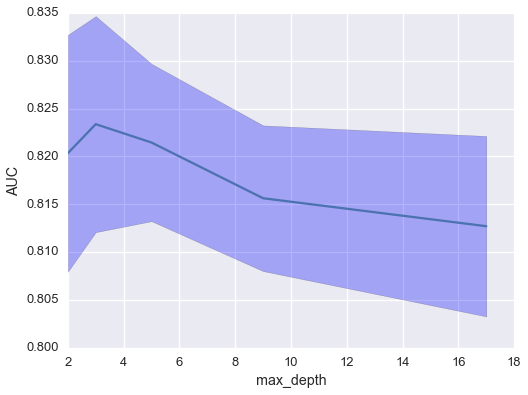

In [36]:
plot_quality(grid_searcher, 'max_depth')

max_depth = 3

In [37]:
%%time

kwargs = {'objective':'binary:logistic', 'missing': -1, 'seed': 56,
          'n_estimators': 160, 'reg_alpha': 6, 'reg_lambda': 1, 'max_depth': 3}

params = {'colsample_bytree': [0.3, 0.5, 0.7, 1]}


grid_searcher = GridSearchCV(XGBC(**kwargs), params, fit_params={'eval_metric': 'auc'}, 
                             cv=5, scoring='roc_auc', n_jobs=-1)
grid_searcher.fit(x_train, y_train)

print(grid_searcher.best_score_)
print(grid_searcher.best_estimator_)

0.82336935443
XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=-1, n_estimators=160, nthread=-1,
       objective='binary:logistic', reg_alpha=6, reg_lambda=1,
       scale_pos_weight=1, seed=56, silent=True, subsample=1)
CPU times: user 4.92 s, sys: 188 ms, total: 5.11 s
Wall time: 25.9 s


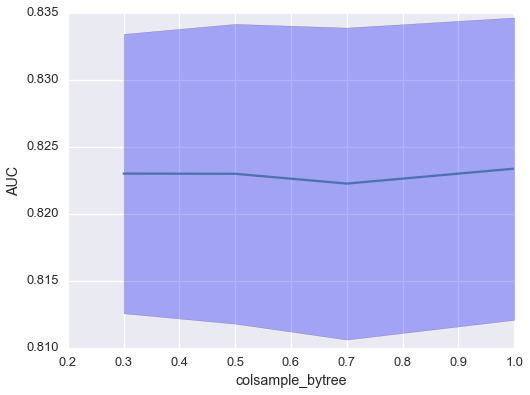

In [38]:
plot_quality(grid_searcher, 'colsample_bytree')

colsample_bytree = 1

In [39]:
%%time

kwargs = {'objective':'binary:logistic', 'missing': -1, 'seed': 56,
          'n_estimators': 160, 'reg_alpha': 6, 'reg_lambda': 1, 'max_depth': 3, 'colsample_bytree': 1}

params = {'gamma': [0, 0.001, 0.01, 0.1, 1, 10]}


grid_searcher = GridSearchCV(XGBC(**kwargs), params, fit_params={'eval_metric': 'auc'}, 
                             cv=5, scoring='roc_auc', n_jobs=-1)
grid_searcher.fit(x_train, y_train)

print(grid_searcher.best_score_)
print(grid_searcher.best_estimator_)

0.82344505739
XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0.001, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=-1, n_estimators=160, nthread=-1,
       objective='binary:logistic', reg_alpha=6, reg_lambda=1,
       scale_pos_weight=1, seed=56, silent=True, subsample=1)
CPU times: user 5.33 s, sys: 147 ms, total: 5.47 s
Wall time: 54.1 s


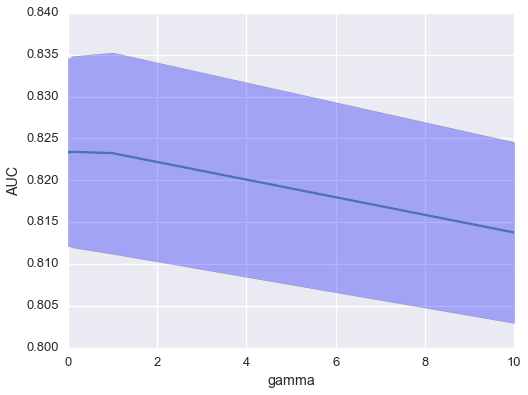

In [40]:
plot_quality(grid_searcher, 'gamma')

In [41]:
%%time

kwargs = {'objective':'binary:logistic', 'missing': -1, 'seed': 56,
          'n_estimators': 160, 'reg_alpha': 6, 'reg_lambda': 1, 'max_depth': 3, 'colsample_bytree': 1}

params = {'gamma': 0.001 * np.arange(0, 10, 1)}


grid_searcher = GridSearchCV(XGBC(**kwargs), params, fit_params={'eval_metric': 'auc'}, 
                             cv=5, scoring='roc_auc', n_jobs=-1)
grid_searcher.fit(x_train, y_train)

print(grid_searcher.best_score_)
print(grid_searcher.best_estimator_)

0.823496360722
XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0.0080000000000000002, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=-1, n_estimators=160,
       nthread=-1, objective='binary:logistic', reg_alpha=6, reg_lambda=1,
       scale_pos_weight=1, seed=56, silent=True, subsample=1)
CPU times: user 6.04 s, sys: 276 ms, total: 6.31 s
Wall time: 1min 24s


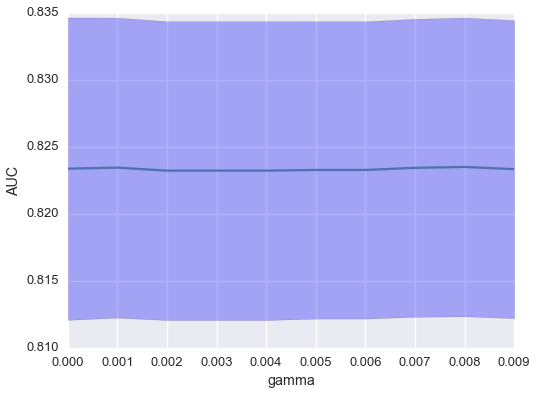

In [42]:
plot_quality(grid_searcher, 'gamma')

gamma = 0.008

In [47]:
%%time

kwargs = {'objective':'binary:logistic', 'missing': -1, 'seed': 56,
          'n_estimators': 160, 'reg_alpha': 6, 'reg_lambda': 1, 'max_depth': 3, 'colsample_bytree': 1,
          'gamma': 0.008}

params = {'learning_rate': [0.09, 0.1, 0.11]}


grid_searcher = GridSearchCV(XGBC(**kwargs), params, fit_params={'eval_metric': 'auc'}, 
                             cv=5, scoring='roc_auc', n_jobs=-1)
grid_searcher.fit(x_train, y_train)

print(grid_searcher.best_score_)
print(grid_searcher.best_estimator_)

0.823496360722
XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0.008, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=-1, n_estimators=160, nthread=-1,
       objective='binary:logistic', reg_alpha=6, reg_lambda=1,
       scale_pos_weight=1, seed=56, silent=True, subsample=1)
CPU times: user 5.04 s, sys: 127 ms, total: 5.16 s
Wall time: 26.2 s


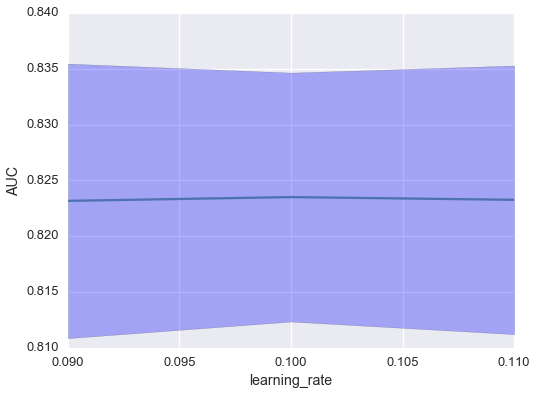

In [48]:
plot_quality(grid_searcher, 'learning_rate')

# Save

In [49]:
kwargs = {'objective':'binary:logistic', 'missing': -1, 'seed': 56,
          'n_estimators': 160, 'reg_alpha': 6, 'reg_lambda': 1, 'max_depth': 3, 'colsample_bytree': 1,
          'gamma': 0.008}

clf = XGBC(**kwargs)
clf.fit(x_train, y_train, eval_metric='auc')
proba = clf.predict_proba(x_test)[:, 1]

save_to_file(proba, 'xbgoost_grid.csv')